# CIGRE European Low Voltage Industrial Network

In [1]:
try:
    import pydae
except:
    print('pydae is not installed, installing')
    !pip install pydae --quiet

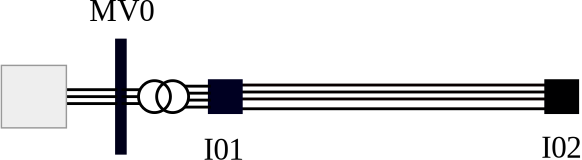

In [2]:
from IPython.core.display import HTML,SVG
SVG('https://tinyurl.com/cigreind')

## Model building

In [3]:
from pydae.urisi.urisi_builder import urisi

data = {
"system":{"S_base":1e6, "K_p_agc":0.01, "K_i_agc":0.01, "K_xif":0.01},
"buses":[
         {"name": "MV0",  "pos_x":   0, "pos_y":   0, "units": "m", "U_kV":20.0, "N_nodes":3, "phi_deg_0":30.0},
         {"name": "I01",  "pos_x":  90, "pos_y":   0, "units": "m", "U_kV":0.4},
         {"name": "I02",  "pos_x": 150, "pos_y":   0, "units": "m", "U_kV":0.4}
        ], 
"transformers":[
        {"bus_j": "MV0",  "bus_k": "I01",  "S_n_kVA": 100, "U_j_kV":20, "U_k_kV":0.4,
         "R_cc_pu": 0.01, "X_cc_pu":0.04, "connection": "Dyn11",   "conductors_j": 3, "conductors_k": 4,
         "monitor":True}
       ],
"lines":[
        { "bus_j": "I01",  "bus_k": "I02",  "code":   "UG2", "m": 100.0, "monitor":True, "sym":False}
        ],
"loads":[
         { "bus": "I02" , "kVA": 100.0, "pf": 0.85, "type":"3P+N", "model":"ZIP"}
        ],
"shunts":[
        {"bus": "I01" , "R":  3.0, "X": 0.0, "bus_nodes": [3]}
         ],
"sources":[
       {"type":"ac3ph3w_ideal", "bus": "MV0", "S_n":100e3, "U_n" :20e3, "R":0.01, "X":0.1}
           ],
"line_codes":
        {
        "UG2":
            {"R":[ [0.314, 0.049, 0.049, 0.049], 
                    [0.049, 0.314, 0.049, 0.049], 
                    [0.049, 0.049, 0.314, 0.049], 
                    [0.049, 0.049, 0.049, 0.314]], 
            "X":[[0.762, 0.687, 0.665, 0.687],
                    [0.687, 0.762, 0.687, 0.665],
                    [0.665, 0.687, 0.762, 0.687],
                    [0.687, 0.665, 0.687, 0.762]], "I_max":200.0
                    },
        }
}

grid = urisi(data)
grid.uz_jacs = False
grid.build('cigre_eu_lv_ind')


VerificationError: LinkError: command 'C:\\Program Files\\Microsoft Visual Studio\\2022\\Community\\VC\\Tools\\MSVC\\14.34.31933\\bin\\HostX86\\x64\\link.exe' failed with exit code 1104

## Model use

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML,SVG

In [16]:
import cigre_eu_lv_ind
from pydae.urisi.utils import report_v
from pydae.urisi.utils import get_v
from pydae.svg_tools import svg

### Initialization and power flow

In [17]:
model = cigre_eu_lv_ind.model()
model.ini({},'xy_0.json')
model.report_y()

V_MV0_0_r = 11546.81
V_MV0_0_i = -0.24
V_MV0_1_r = -5773.61
V_MV0_1_i = -9999.72
V_MV0_2_r = -5773.20
V_MV0_2_i = 9999.95
V_I01_0_r = 190.21
V_I01_0_i = -117.70
V_I01_1_r = -197.01
V_I01_1_i = -105.90
V_I01_2_r =  6.77
V_I01_2_i = 223.59
V_I01_3_r =  0.00
V_I01_3_i = -0.00
V_I02_0_r = 187.09
V_I02_0_i = -114.43
V_I02_1_r = -192.93
V_I02_1_i = -105.00
V_I02_2_r =  5.82
V_I02_2_i = 219.77
V_I02_3_r = -0.01
V_I02_3_i = -0.34
i_load_I02_a_r = -68.67
i_load_I02_a_i = 135.72
i_load_I02_b_r = 151.62
i_load_I02_b_i = -8.77
i_load_I02_c_r = -83.13
i_load_I02_c_i = -126.52
i_load_I02_n_r =  0.17
i_load_I02_n_i = -0.43
i_vsc_MV0_a_r =  2.54
i_vsc_MV0_b_r = -2.71
i_vsc_MV0_c_r =  0.17
i_vsc_MV0_a_i = -1.67
i_vsc_MV0_b_i = -1.36
i_vsc_MV0_c_i =  3.03
omega_coi =  1.00
p_agc =  0.00


#### Results

In [18]:
report_v(model, data);

V_MV0_an: 11546.8|   -0.0º V,    V_MV0_ag: 11546.8|   -0.0º V,    V_1 = 11546.8 V, unb = 0.00%
V_MV0_bn: 11546.8| -120.0º V,    V_MV0_bg: 11546.8| -120.0º V,    V_2 =     0.0 V
V_MV0_cn: 11546.8|  120.0º V,    V_MV0_cg: 11546.8|  120.0º V,    v_0 =     0.0 V
  V_MV0_ng:      0.0|      0.0º V
V_I01_an:   223.7|  -31.7º V,    V_I01_ag:   223.7|  -31.7º V,    V_1 =   223.7 V, unb = 0.01%
V_I01_bn:   223.7| -151.7º V,    V_I01_bg:   223.7| -151.7º V,    V_2 =     0.0 V
V_I01_cn:   223.7|   88.3º V,    V_I01_cg:   223.7|   88.3º V,    v_0 =     0.0 V
  V_I01_ng:      0.0|    -43.3º V
V_I02_an:   219.1|  -31.4º V,    V_I02_ag:   219.3|  -31.5º V,    V_1 =   219.6 V, unb = 0.48%
V_I02_bn:   219.5| -151.5º V,    V_I02_bg:   219.6| -151.4º V,    V_2 =     0.2 V
V_I02_cn:   220.2|   88.5º V,    V_I02_cg:   219.8|   88.5º V,    v_0 =     0.1 V
  V_I02_ng:      0.3|    -91.9º V


In [19]:
get_v(model,'I02','V_bn_m')

219.47502635519004

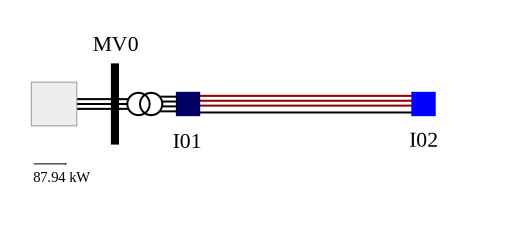

In [20]:
s = svg('cigre_eu_lv_ind_tooltips.svg')
s.set_grid(model,data)
s.set_text('MV0_P',f"{model.get_value('p_MV0')/1000:5.2f} kW")
s.set_tooltips('cigre_eu_lv_ind_results.svg')    
SVG('cigre_eu_lv_ind_results.svg')

### Load change

In [12]:
model.report_u()

p_load_I02_a =28333.33
q_load_I02_a =17559.42
g_load_I02_a = 0.00
b_load_I02_a = 0.00
p_load_I02_b =28333.33
q_load_I02_b =17559.42
g_load_I02_b = 0.00
b_load_I02_b = 0.00
p_load_I02_c =28333.33
q_load_I02_c =17559.42
g_load_I02_c = 0.00
b_load_I02_c = 0.00
e_ao_m_MV0 =11547.01
e_bo_m_MV0 =11547.01
e_co_m_MV0 =11547.01
phi_MV0 = 0.00
u_freq = 0.00


In [13]:
model.ini({'p_load_I02_a':50e3, 'q_load_I02_a':10e3,
           'p_load_I02_b': 0e3, 'q_load_I02_b': 0e3,
           'p_load_I02_c': 0e3, 'q_load_I02_c': 0e3,
           },'xy_0.json')

True

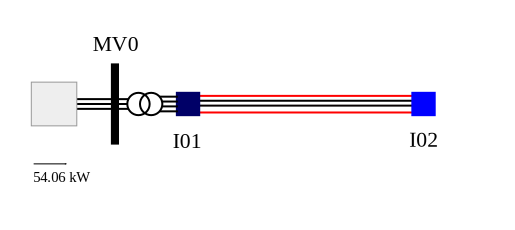

In [14]:
s = svg('cigre_eu_lv_ind_tooltips.svg')
s.set_grid(model,data)
s.set_text('MV0_P',f"{model.get_value('p_MV0')/1000:5.2f} kW")
s.set_tooltips('cigre_eu_lv_ind_results_unb.svg')    
SVG('cigre_eu_lv_ind_results_unb.svg')